# ML Project House Price Prediction

In [56]:
# Step 1 Load Important Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# ==============================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
print('Done')

Done


In [57]:
# Step 2 Load dataset
try:
  from sklearn.datasets import fetch_california_housing
  raw_data = fetch_california_housing()
  print('Done')
except:
  try:
    raw_data = pd.read_csv('/content/house_data.csv')
  except:
    raw_data = pd.read_csv('house_data.csv')
  finally:
    print('Done')

/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


Done


In [58]:
try:
  X = raw_data['data']
  y = raw_data['target']
  print('Done')
except:
  X = raw_data.iloc[:,:-1]
  y = raw_data.iloc[:,-1]
  print('Done')
# Equation of Line: y = M*X + C: Best Line Find

Done


In [59]:
try:
  df = pd.DataFrame(X,columns = raw_data['feature_names'])
except:
  df = X

df.sample(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20449,4.0474,22,4.745070,1.085915,2751,3.874648,34.28,-118.88
14523,2.8588,14,3.877088,1.118138,1929,2.301909,32.90,-117.12
9479,1.8500,27,4.039755,1.033639,779,2.382263,39.40,-123.35


# Step 3: EDA

In [60]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25


In [61]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32
20639,2.3886,16,5.254717,1.162264,1387,2.616981,39.37,-121.24


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  int64  
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  int64  
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.3 MB


In [63]:
# Machine Learning Each X data much be numerical

In [64]:
# checking null values

df.isna().sum()
# Since all values are zero hence no missing data

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [65]:
r,c = df.shape
print('Total rows',r)
print('Total Columns',c)

Total rows 20640
Total Columns 8


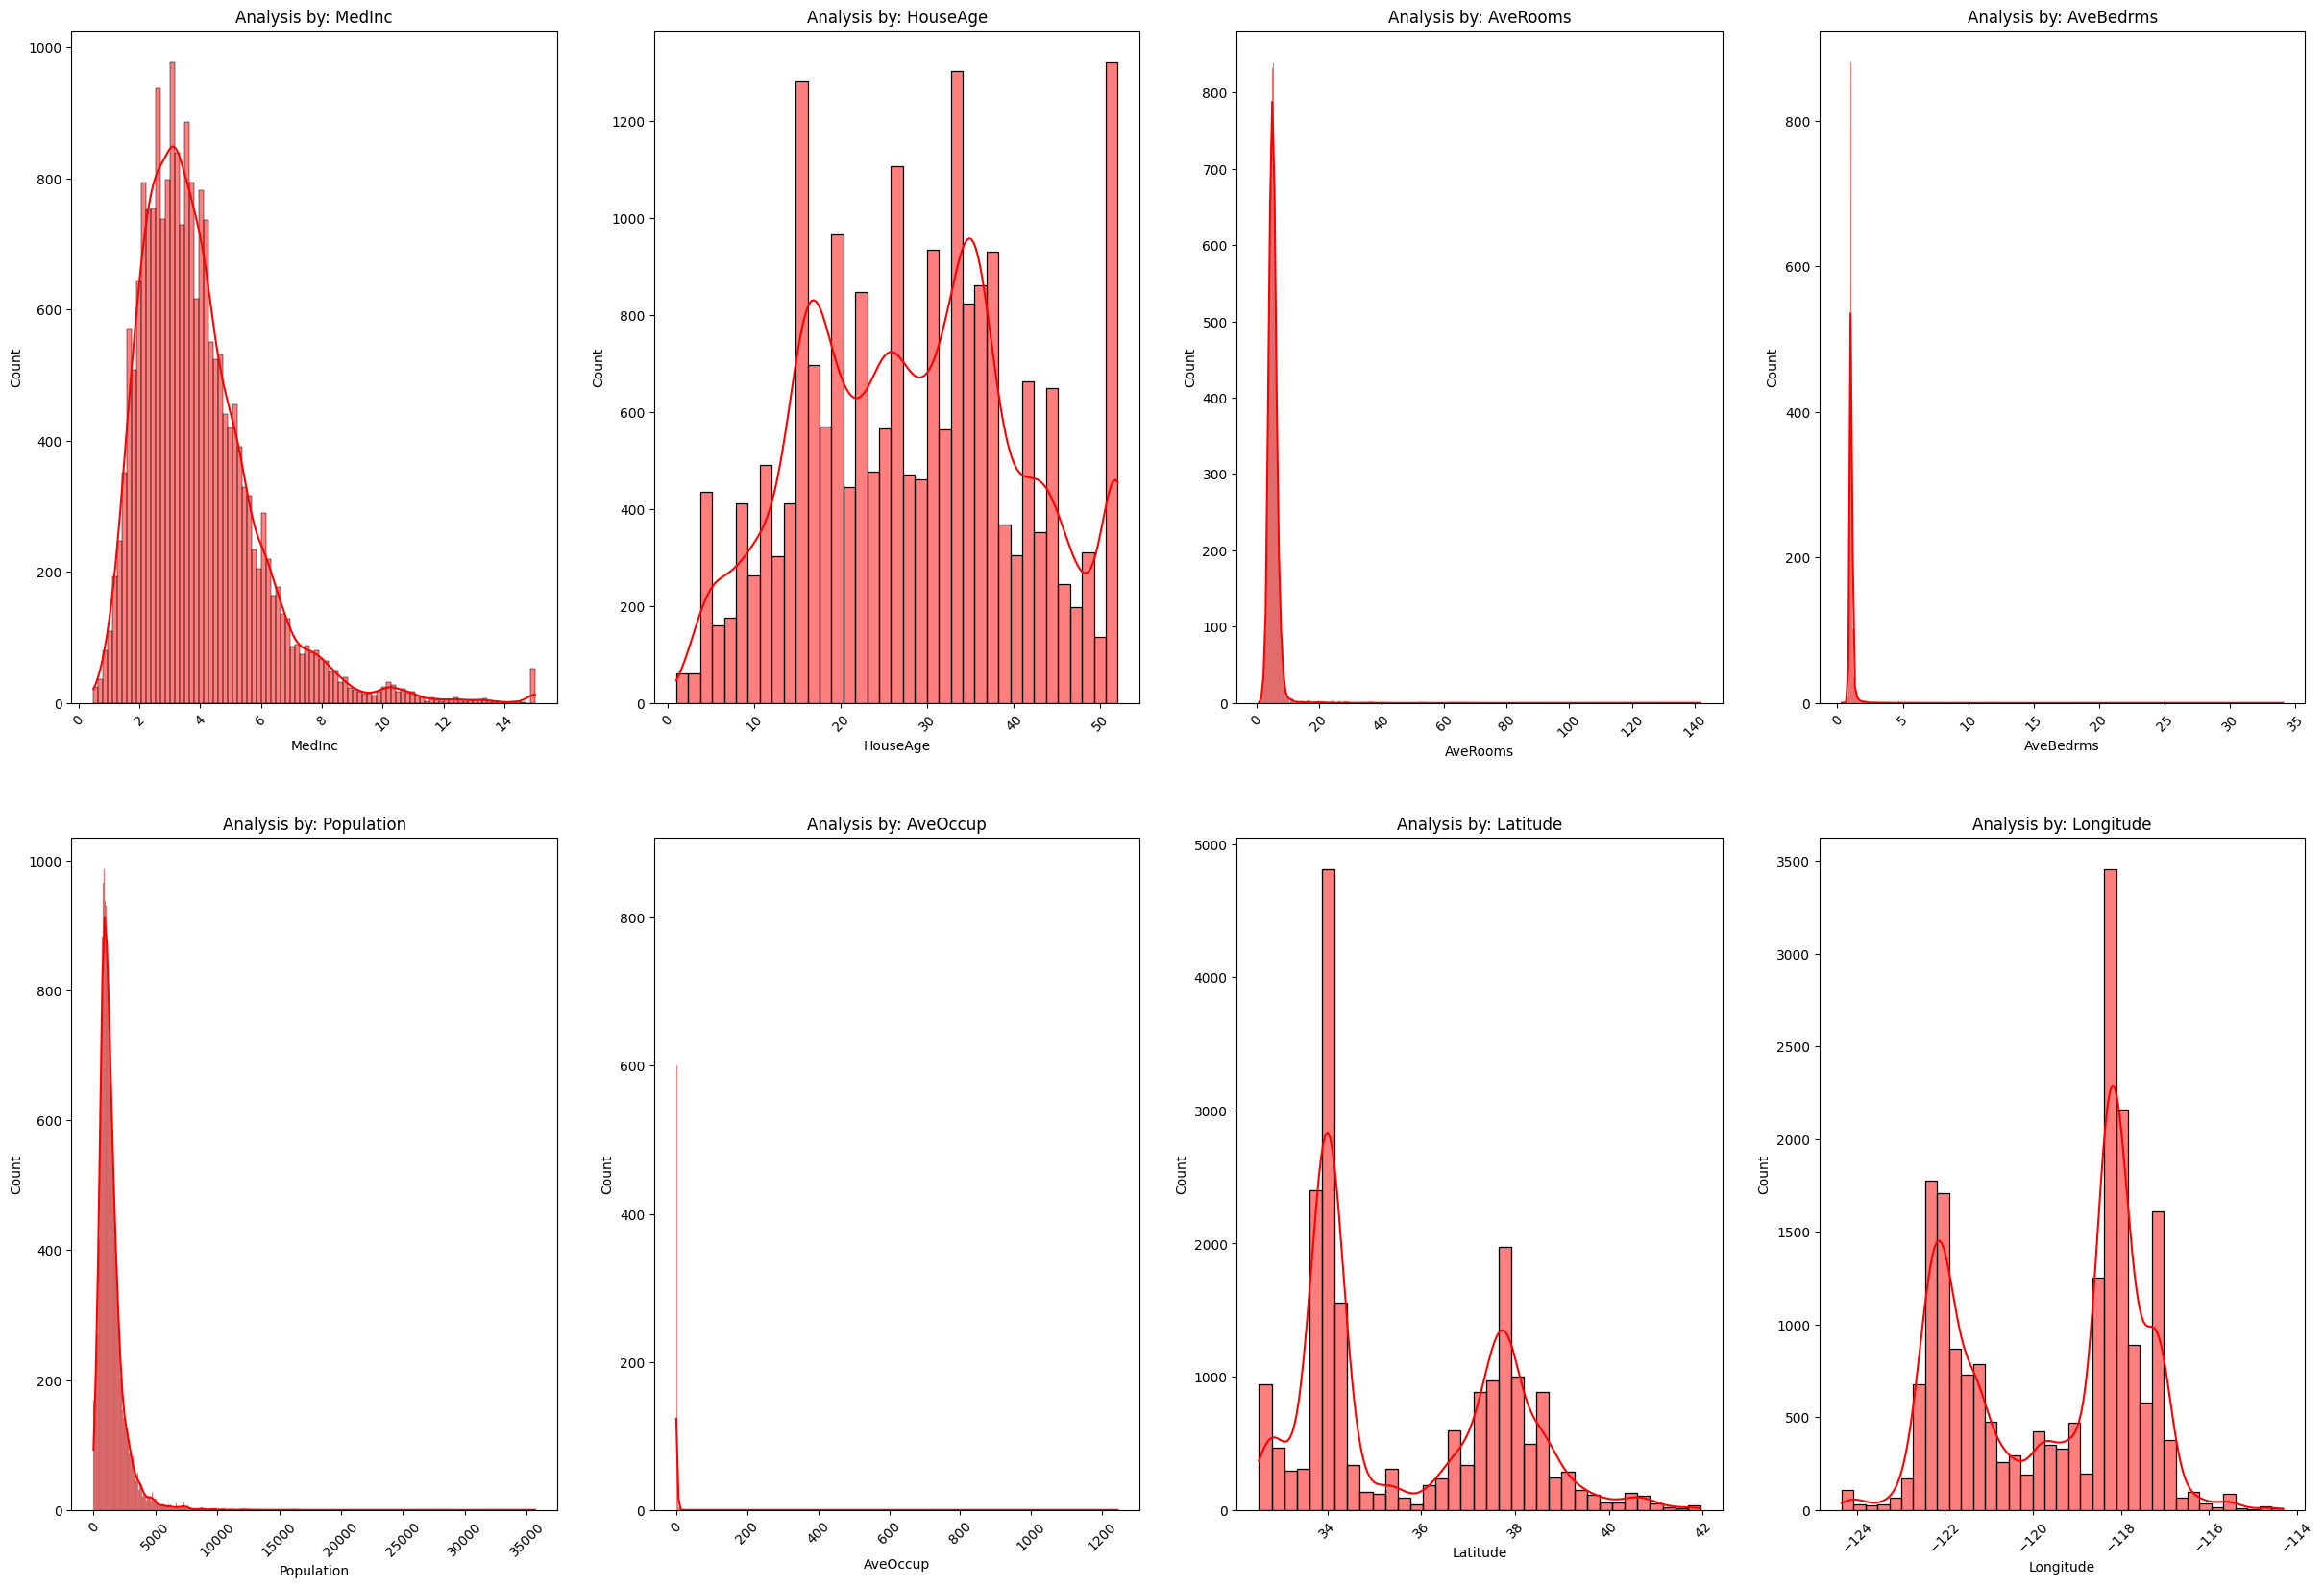

In [66]:
plt.figure(figsize = (30,20))

first = 1
for i in df:
  plt.subplot(2,4,first)
  plt.title(f'Analysis by: {i}')
  sns.histplot(data = df, x = i, color = 'r',
               kde = True)
  plt.xticks(rotation = 45)
  first += 1
plt.savefig('Numerical_Analysis.jpg', dpi  = 1000)
plt.show()

In [67]:
# to check correlation b/w X features
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


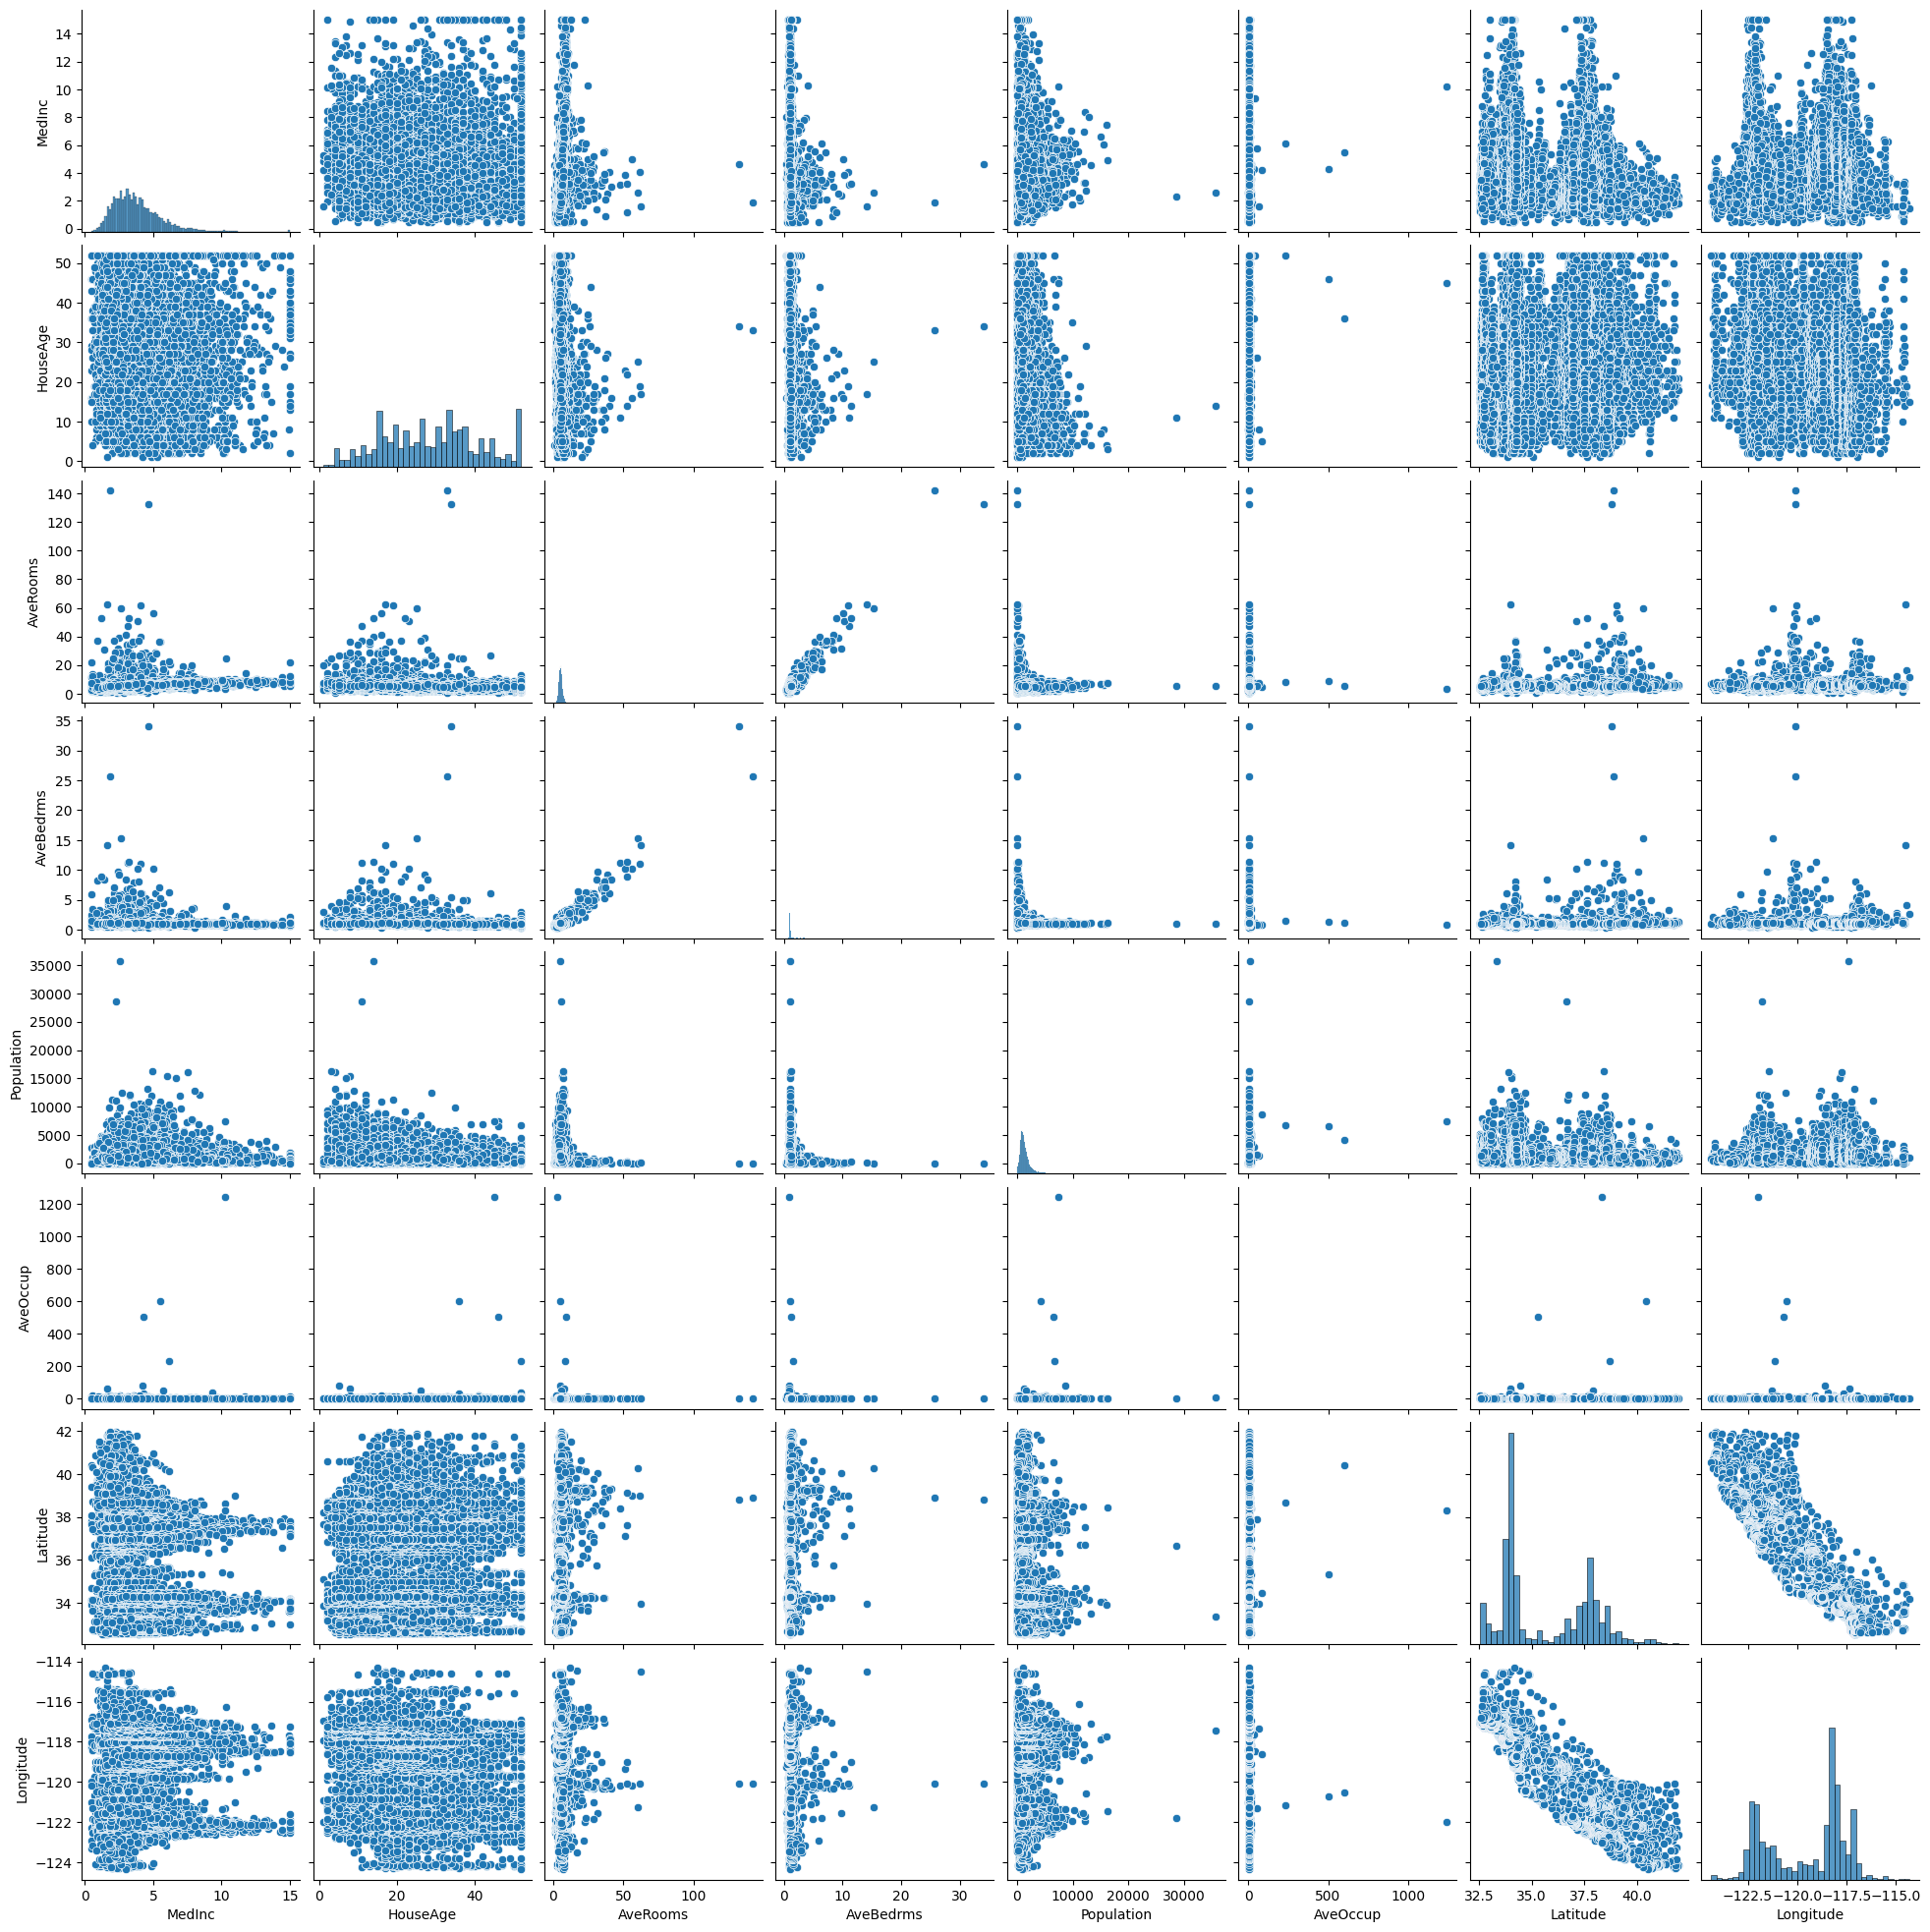

In [68]:
# to check correlation by visuals
sns.pairplot(data = df)
plt.show()

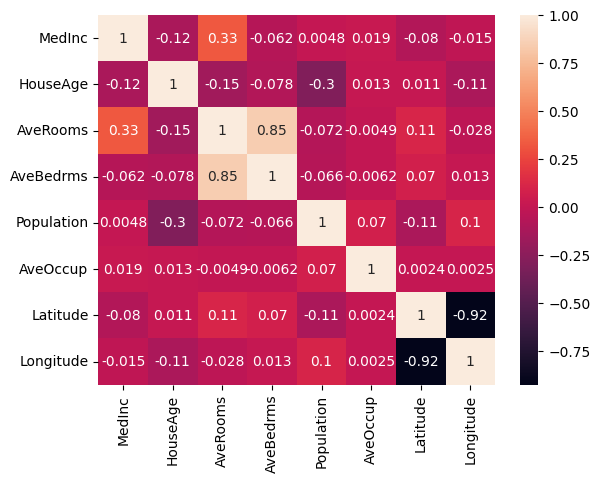

In [69]:
sns.heatmap(df.corr(), annot = True)
plt.show()

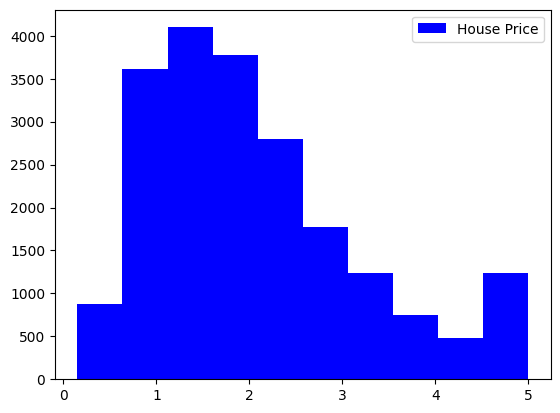

In [70]:
plt.hist(y, color = 'b', label = 'House Price')
plt.legend()
plt.show()

In [71]:
# print(raw_data['DESCR'])

In [72]:
print(y)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64


In [73]:
# House Price Ans: 2.5  = 2.5 * 100000
# 4.5 = 4.5*100000


In [74]:
final_X = df.iloc[:, :-2]

In [75]:
# Here we are using -2 Ignore last two columns

Step 4 : Convert data to standard Scaling

In [76]:
from sklearn.preprocessing import StandardScaler
# ML: Works on distance algos, it is
# important to keep every data at same scale

final_X = df.iloc[:, :-2]

scaler = StandardScaler()
scaled_X = scaler.fit_transform(final_X)
print('Done')

Done


In [77]:
#

# Step 5: ML Model Creation

In [78]:
# train test split: divide data into two parts

In [79]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(scaled_X, y)
print('Done')

Done


In [80]:
all_models = [LinearRegression,
              SVR,
              DecisionTreeRegressor,
              RandomForestRegressor,
              KNeighborsRegressor]

all_models_name = ['Linear regression',
                   'Support Vector',
                   'Decision Tree',
                   'Random Forest',
                   'KNN']
print('Done')

Done


In [81]:
model_dict = {'Model_Name':[],
              'ML_Model':[],
              'Score':[],
              'MAE':[],
              'MSE':[],
              'RMSE':[]}

counter = 0
for i in all_models:
  print('Training: ',all_models_name[counter])
  ml_model = i()

  # Training
  ml_model.fit(X_train,y_train)

  # prediction
  y_pred = ml_model.predict(X_test)

  # Model Score
  score = ml_model.score(X_test,y_test)

  # Errors Comparison
  mae = mean_absolute_error(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)
  rmse = mse**0.5
  # RMSE: root mean squared Error

  # data append

  model_dict['Model_Name'].append(all_models_name[counter])
  counter += 1

  model_dict['ML_Model'].append(ml_model)
  model_dict['Score'].append(score)
  model_dict['MAE'].append(mae)
  model_dict['MSE'].append(mse)
  model_dict['RMSE'].append(rmse)

print('Done')

Training:  Linear regression
Training:  Support Vector
Training:  Decision Tree
Training:  Random Forest
Training:  KNN
Done


In [82]:
#

# Step 6: Model Comparison

In [83]:
compare_df = pd.DataFrame(model_dict)

In [84]:
compare_df

,Model_Name,ML_Model,Score,MAE,MSE,RMSE
0,Linear regression,LinearRegression(),0.553725,0.566275,0.584388,0.764453
1,Support Vector,SVR(),0.680995,0.455446,0.417731,0.646321
2,Decision Tree,DecisionTreeRegressor(),0.374487,0.640739,0.819097,0.905040
3,Random Forest,"(DecisionTreeRegressor(max_features=1.0, rando...",0.694736,0.456675,0.399737,0.632248
4,KNN,KNeighborsRegressor(),0.598953,0.524406,0.525164,0.724682


In [85]:
# Because RandomForest has highest score,
# we will use RF
# as final Model

/tmp/ipython-input-759117082.py:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  chart = sns.barplot(data = compare_df,


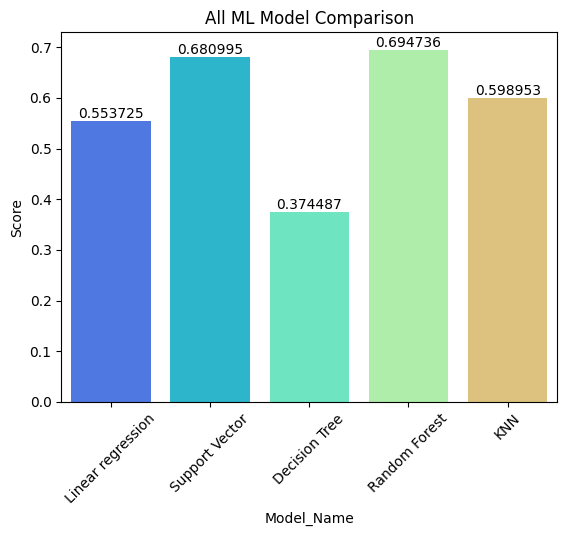

In [86]:
plt.title('All ML Model Comparison')
chart = sns.barplot(data = compare_df,
            x= 'Model_Name',
            y = 'Score',
            hue = 'Model_Name',
            palette = sns.color_palette('rainbow'))

for i in chart.containers:
  plt.bar_label(i)
plt.xticks(rotation = 45)
plt.show()

# Step 7: Final Model Save

In [87]:
# Random Forest

final_model = compare_df.iloc[3,1]
print('Done')

Done


# Step 8: Save necessary objects

In [88]:
# Model save
import pickle
with open('chatgpt.pkl', 'wb') as f:
  pickle.dump(final_model,f)
  print('Model Saved Successfully')


Model Saved Successfully


# Step 9 : Website Deployment using Streamlit

In [89]:
# pip install streamlit
print('Done')

Done
